In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
print(data.tail())

      ResponseId                                         MainBranch  \
2887        2888                     I am a developer by profession   
2888        2889                     I am a developer by profession   
2889        2890                     I am a developer by profession   
2890        2891  I am not primarily a developer, but I write co...   
2891        2892                     I am a developer by profession   

                  Age                              Employment  \
2887  18-24 years old                     Employed, full-time   
2888  25-34 years old                     Employed, full-time   
2889  25-34 years old                     Employed, full-time   
2890  25-34 years old  Employed, full-time;Student, part-time   
2891  45-54 years old                     Employed, full-time   

                                RemoteWork   Check  \
2887                             In-person  Apples   
2888                             In-person  Apples   
2889  Hybrid (some r

C:\Users\DELL\AppData\Local\Temp\ipykernel_14060\116845966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


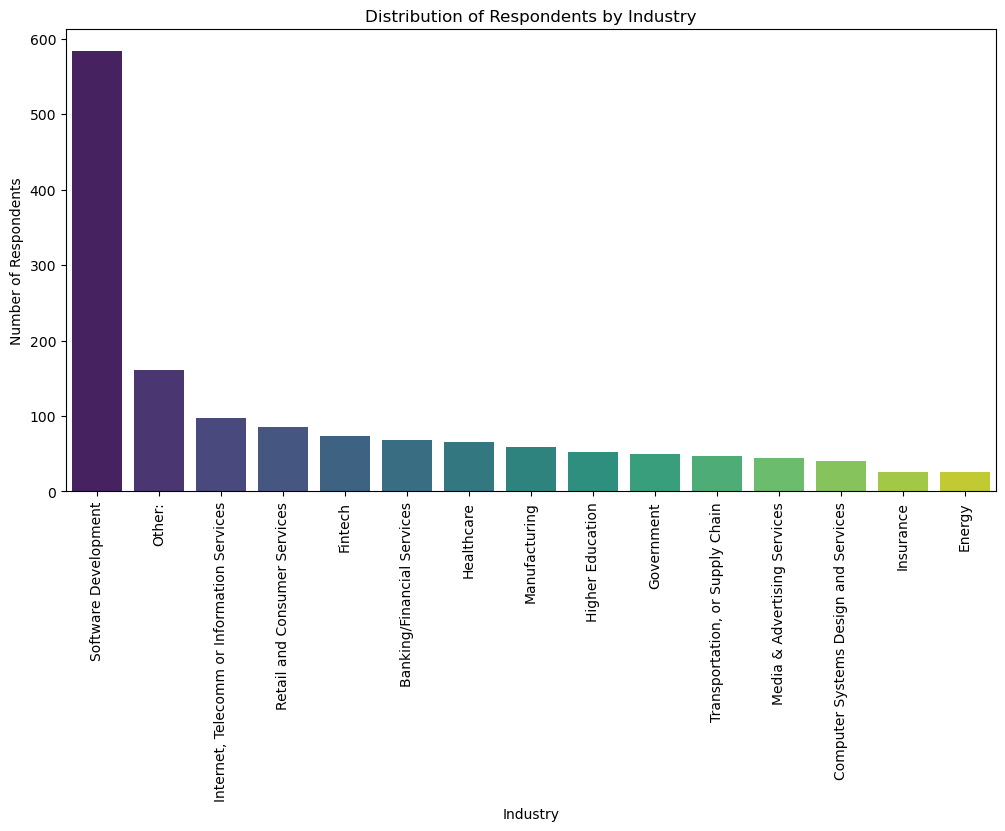

In [5]:
# Count the number of respondents in each industry
industry_counts = data['Industry'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel("Industry")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Respondents by Industry")

# Show the plot
plt.show()

In [7]:
# Calculate statistics
mean_salary = data['ConvertedCompYearly'].mean()
median_salary = data['ConvertedCompYearly'].median()
std_salary = data['ConvertedCompYearly'].std()

# Define the threshold for extreme compensation
threshold = mean_salary + (3 * std_salary)

# Identify respondents with extremely high compensation
high_earners = data[data['ConvertedCompYearly'] > threshold]

# Display results
print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")
print(f"Standard Deviation: {std_salary:.2f}")
print(f"Threshold for extreme compensation: {threshold:.2f}")
print(f"Number of respondents with extreme compensation: {len(high_earners)}")

# Display high earners
high_earners[['ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False)

Mean Salary: 102200.15
Median Salary: 82802.00
Standard Deviation: 104865.58
Threshold for extreme compensation: 416796.90
Number of respondents with extreme compensation: 15


,ConvertedCompYearly
2187,2000000.0
828,1000000.0
2316,1000000.0
1932,945000.0
2592,800000.0
2171,750000.0
529,650000.0
2177,639000.0
2494,636440.0
1488,600000.0


Q1 (25th percentile): 45000.00
Q3 (75th percentile): 135000.00
IQR: 90000.00
Lower Bound: -90000.00
Upper Bound: 270000.00
Number of Outliers: 44


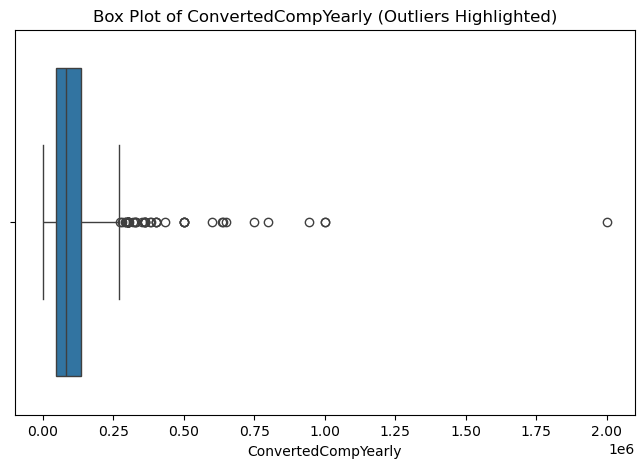

In [13]:
# Calculate Q1, Q3, and IQR
Q1 = data['ConvertedCompYearly'].quantile(0.25)
Q3 = data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['ConvertedCompYearly'] < lower_bound) | (data['ConvertedCompYearly'] > upper_bound)]

# Print statistics
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")

# Box plot visualization
plt.figure(figsize=(8,5))
sns.boxplot(x=data['ConvertedCompYearly'])
plt.title("Box Plot of ConvertedCompYearly (Outliers Highlighted)")
plt.show()

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = data['ConvertedCompYearly'].quantile(0.25)
Q3 = data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_cleaned = data[(data['ConvertedCompYearly'] >= lower_bound) & (data['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {data.shape}")
print(f"New DataFrame size after removing outliers: {data_cleaned.shape}")

Original DataFrame size: (2892, 114)
New DataFrame size after removing outliers: (1365, 114)


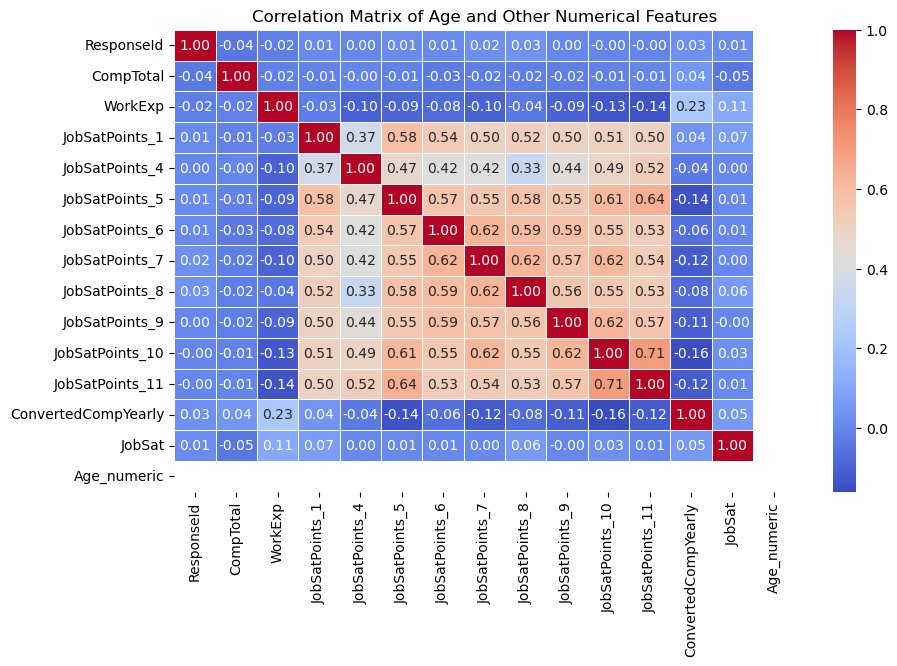

In [17]:
# Step 1: Map Age to Numeric Values (if needed)
age_mapping = {
    'Under 18 years': 17,
    '18-24 years': 21,
    '25-34 years': 29,
    '35-44 years': 39,
    '45-54 years': 49,
    '55-64 years': 59,
    '65 years or older': 70
}

# Apply mapping
data['Age_numeric'] = data['Age'].map(age_mapping)

# Step 2: Compute Correlations
corr_matrix = data.select_dtypes(include=['number']).corr()

# Step 3: Visualize the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Age and Other Numerical Features')
plt.show()